In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
def preprocessing(X):
    ct = ColumnTransformer(transformers=[
        ("encoder", OneHotEncoder(sparse=False), [4, 5]),
        ("discretizer", KBinsDiscretizer(n_bins=[3, 3, 3, 3], encode='onehot-dense', strategy='quantile'), [0, 1, 2, 3])
    ], remainder="passthrough")
    X = np.array(ct.fit_transform(X))

    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X

In [3]:
def scan(file_name):
    dataset = pd.read_csv(file_name)
    X = dataset.iloc[:, :-1].values
    Y = dataset.iloc[:, -1].values
    return X, Y

In [4]:
def k_means(X, Y):
    cluster = KMeans(n_clusters=6, init='k-means++', random_state=42)
    Y_pred = cluster.fit_predict(X)
    Y_pred = adapt(Y_pred, Y)
    result(accuracy_score(Y, Y_pred), 'K-Means')

In [6]:
def result(accuracy, algorithm):
    print(f"{algorithm}:")
    print(f"Accuracy= {accuracy}")
    print("--------------------------")

In [5]:
def agglomerative(X, Y):
    cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
    Y_pred = cluster.fit_predict(X)
    Y_pred = adapt(Y_pred, Y)
    result(accuracy_score(Y, Y_pred), 'Hierarchical')

In [7]:
def draw_wcss(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [8]:
def adapt(Y_pred, Y):
    newY_pred = np.array(range(len(Y_pred)))
    for i in range(0, 6):
        data = Counter(Y[Y_pred == i])
        newY_pred[Y_pred == i] = data.most_common(1)[0][0]
    return newY_pred

In [9]:
def draw_dendrogram(X):
    sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Clusters')
    plt.ylabel('Euclidean distances')
    plt.show()

In [12]:
def main():
    X, Y = scan('Stars.csv')
    X = preprocessing(X)

    draw_wcss(X)
    draw_dendrogram(X)

    k_means(X, Y)
    agglomerative(X, Y)


c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change fro

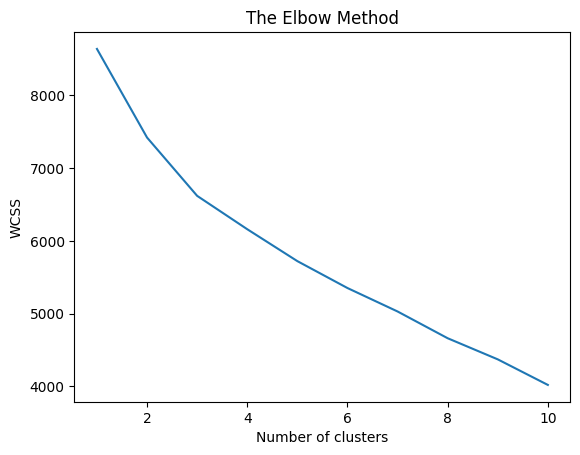

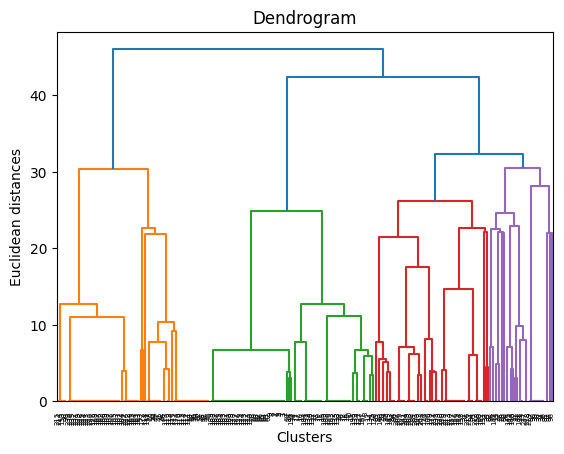

K-Means:
Accuracy= 0.7458333333333333
--------------------------
Hierarchical:
Accuracy= 0.6083333333333333
--------------------------


c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
if __name__ == '__main__':
    main()